# Dataset Redone
---
[Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@pitt.edu
---
## Summary

We have discovered several issues with our splits:
- Contentment is a dominating force which rebalancing does not help
- Minority emotions are severely underclassed

This required us to completely re-examine how we are treating this dataset. To combat these issues we decided on the following:
1. One utterance per painting sampled with a weight on utterance length from the majority emotion (text and image modalities will have equal datapoints)
2. Rebalance such that `disgust` and `anger` are grouped together; more statistical power
3. Rebalace such that `excitement` and `amusement`; to keep it 3 positive and 3 negative emotions
4. Pre-downsample `contentment`; it is just too dominating
5. Downsize to have approximately 19k total samples, keeping data proportions; this makes it easier for us to train models
6. Perform data splits, stratified to preserve class balancing for the test set
---
## Setup
### Necessary Imports

In [53]:
from nltk import word_tokenize
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Settings

In [75]:
# Turn this off
%pprint
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_palette("deep")
sns.color_palette("deep")

Pretty printing has been turned ON


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

### Globals

In [3]:
DATA = "../data/splits.csv"
SEED = 42

### Dataset

In [4]:
# Start from here since we already filtered out minority emotions
df = pd.read_csv(DATA, index_col=False).drop(columns=["split", "count", "repetition"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196844 entries, 0 to 196843
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   painting   196844 non-null  object 
 1   artist     196844 non-null  object 
 2   art_style  196844 non-null  object 
 3   year       114631 non-null  float64
 4   utterance  196844 non-null  object 
 5   emotion    196844 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.0+ MB


---
## 1. One Utterance per Painting

In [5]:
# This should stay the same after our operation
UNIQUE = len(df["painting"].unique())
UNIQUE

71219

In [6]:
# Get utterance length
df["len"] = df["utterance"].map(lambda x: len(word_tokenize(x)))

In [7]:
df.iloc[df["len"].idxmax(), :]

painting                         marc-chagall_the-fiddler-1913
artist                                            marc-chagall
art_style                                               Cubism
year                                                    1913.0
utterance    the white snow is a great backdrop for this, a...
emotion                                              amusement
len                                                        226
Name: 53176, dtype: object

In [8]:
df = df.sort_values(by=["painting"])
df = df.groupby(["painting"]).sample(1, weights=df["len"], random_state=SEED).reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71219 entries, 0 to 71218
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   71219 non-null  object 
 1   artist     71219 non-null  object 
 2   art_style  71219 non-null  object 
 3   year       41727 non-null  float64
 4   utterance  71219 non-null  object 
 5   emotion    71219 non-null  object 
 6   len        71219 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 3.8+ MB


---
## 2. Merge `disgust` and `anger`

Name will simply be `disgust-anger`.

In [10]:
df["emotion"] = df["emotion"].map(lambda x: "disgust-anger" if x in ["disgust", "anger"] else x)

In [11]:
df["emotion"].unique()

array(['fear', 'amusement', 'sadness', 'contentment', 'excitement', 'awe',
       'something else', 'disgust-anger'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71219 entries, 0 to 71218
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   71219 non-null  object 
 1   artist     71219 non-null  object 
 2   art_style  71219 non-null  object 
 3   year       41727 non-null  float64
 4   utterance  71219 non-null  object 
 5   emotion    71219 non-null  object 
 6   len        71219 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 3.8+ MB


---
## 3. Merge `excitement` and `amusement`

Name will simply be `excitement-amusement`.

In [13]:
df["emotion"] = df["emotion"].map(lambda x: "excitement-amusement" if x in ["excitement", "amusement"] else x)

In [14]:
df["emotion"].unique()

array(['fear', 'excitement-amusement', 'sadness', 'contentment', 'awe',
       'something else', 'disgust-anger'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71219 entries, 0 to 71218
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   71219 non-null  object 
 1   artist     71219 non-null  object 
 2   art_style  71219 non-null  object 
 3   year       41727 non-null  float64
 4   utterance  71219 non-null  object 
 5   emotion    71219 non-null  object 
 6   len        71219 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 3.8+ MB


---
## 4. Downsample `contentment`

Let's figure out how much to downsample by

<Axes: xlabel='emotion'>

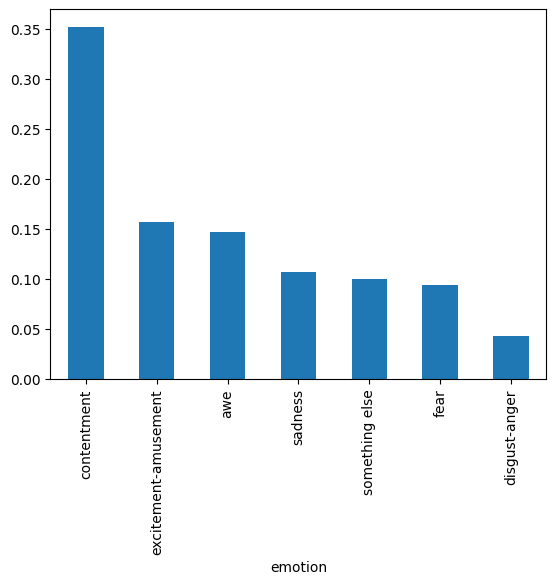

In [16]:
df["emotion"].value_counts(normalize=True).plot(kind="bar")

In [17]:
len(df[df["emotion"] == "contentment"])

25074

Downsample by a factor of 2.5.

In [18]:
cont_sample = df["painting"].isin(df[df["emotion"] == "contentment"].sample(frac=0.4, random_state=SEED)["painting"])
other = df["emotion"] != "contentment"
mask = cont_sample | other
mask

0         True
1         True
2         True
3         True
4         True
         ...  
71214    False
71215     True
71216     True
71217    False
71218     True
Length: 71219, dtype: bool

In [19]:
df = df[mask]

<Axes: xlabel='emotion'>

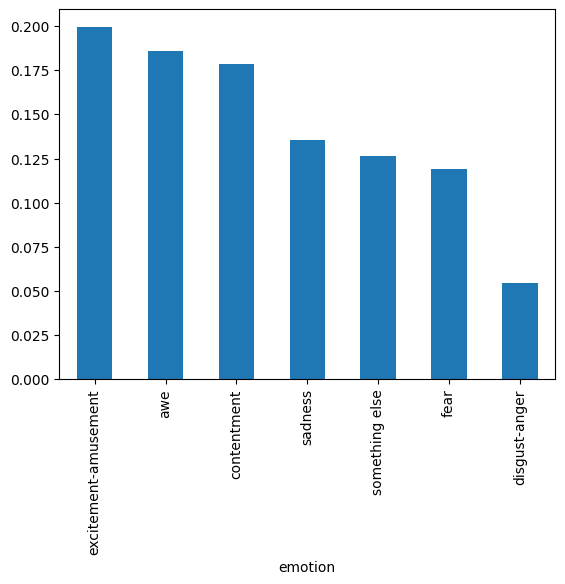

In [20]:
df["emotion"].value_counts(normalize=True).plot(kind="bar")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56175 entries, 0 to 71218
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   56175 non-null  object 
 1   artist     56175 non-null  object 
 2   art_style  56175 non-null  object 
 3   year       33168 non-null  float64
 4   utterance  56175 non-null  object 
 5   emotion    56175 non-null  object 
 6   len        56175 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 3.4+ MB


In [22]:
# Add the factor column
df["factor"] = df["emotion"].map(lambda x: 2.5 if x == "contentment" else 1.0)

In [23]:
df.sample(15, random_state=SEED)

,painting,artist,art_style,year,utterance,emotion,len,factor
15779,edward-burne-jones_the-soul-attains,edward-burne-jones,Romanticism,NaN,this picture is beautiful with how realistic b...,awe,13,1.0
29327,iosif-iser_seated-woman-with-yellow-jacket,iosif-iser,Expressionism,NaN,the woman looks angry. the detail in this is i...,awe,26,1.0
28949,ilya-repin_portrait-of-the-author-leonid-andre...,ilya-repin,Realism,1904.0,he looks like he is thinking of someone he lost.,sadness,11,1.0
70114,william-merritt-chase_the-lake-for-miniature-y...,william-merritt-chase,Impressionism,NaN,the colors used to illustrate that it's a nice...,awe,12,1.0
6453,barnett-newman_onement-i-1948,barnett-newman,Color_Field_Painting,1948.0,the orange line is slightly sloppy creating a ...,fear,26,1.0
54470,pierre-alechinsky_pleasant-surrounding-un-bon-...,pierre-alechinsky,Expressionism,1962.0,the voices in his head have finally gotten out,fear,9,1.0
34240,joan-miro_portrait-of-a-spanish-dancer,joan-miro,Cubism,NaN,the colors as well as the shapes used to shape...,awe,19,1.0
58265,raphael_isaac-and-rebecca-spied-upon-by-abimel...,raphael,High_Renaissance,1519.0,the white specs all over the painting remind m...,awe,27,1.0
65802,vasily-surikov_portrait-of-e-n-sabashnikova-1907,vasily-surikov,Realism,1907.0,feel neutral due to the dull colors of the dre...,something else,12,1.0
4609,annibale-carracci_the-butcher-s-shop,annibale-carracci,Baroque,NaN,it's kind of gross to look at meat hanging up ...,disgust-anger,21,1.0


---
## 5. Dataset Downsize

In [24]:
FACTOR = 2.956578947
# Truly random to not make it too biased towards longer descriptions
down_df = df.groupby(["emotion"]).sample(frac=1/FACTOR, random_state=SEED).reset_index(drop=True)

In [25]:
down_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   19000 non-null  object 
 1   artist     19000 non-null  object 
 2   art_style  19000 non-null  object 
 3   year       11221 non-null  float64
 4   utterance  19000 non-null  object 
 5   emotion    19000 non-null  object 
 6   len        19000 non-null  int64  
 7   factor     19000 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


/tmp/ipykernel_18142/3685188771.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  ax = sns.countplot(down_df, x='emotion', stat='percent', hue='emotion', order=top, hue_order=top, palette=sns.color_palette("colorblind"))


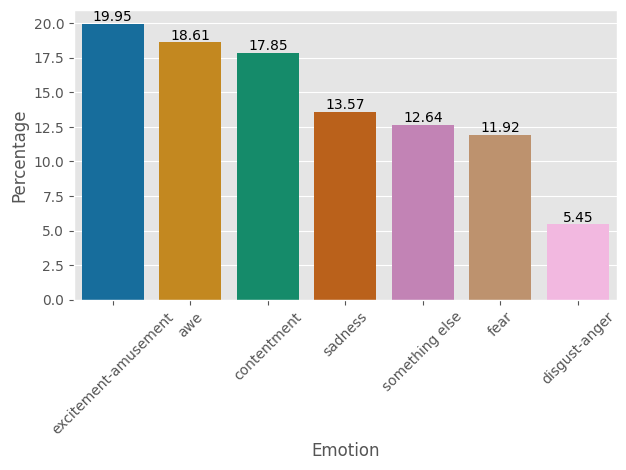

In [80]:
top = down_df["emotion"].value_counts().index
ax = sns.countplot(down_df, x='emotion', stat='percent', hue='emotion', order=top, hue_order=top, palette=sns.color_palette("colorblind"))
ax.tick_params('x', rotation=45)
ax.set_xlabel('Emotion')
ax.set_ylabel('Percentage')

for c in ax.containers:
    ax.bar_label(c, fmt="%.2f")

plt.tight_layout()

plt.savefig("figures/dist-after.pdf", format="pdf")

/tmp/ipykernel_18142/2931571072.py:2: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(down_df, x='art_style', stat='percent', hue='art_style', order=top, hue_order=top, palette=sns.color_palette("colorblind"))


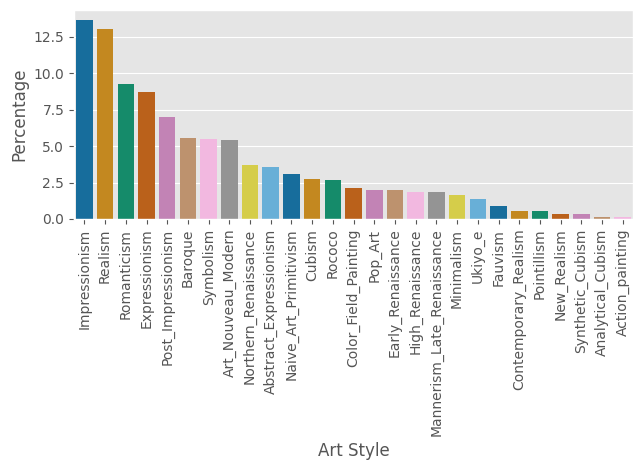

In [81]:
top = down_df["art_style"].value_counts().index
ax = sns.countplot(down_df, x='art_style', stat='percent', hue='art_style', order=top, hue_order=top, palette=sns.color_palette("colorblind"))
ax.tick_params('x', rotation=90)
ax.set_xlabel('Art Style')
ax.set_ylabel('Percentage')

# for c in ax.containers:
#     ax.bar_label(c, fmt="%.2f")

plt.tight_layout()

plt.savefig("figures/dist-after-style.pdf", format="pdf")

---
## Stratified Splits

In [27]:
down_df.head(10)

,painting,artist,art_style,year,utterance,emotion,len,factor
0,lorenzo-lotto_st-jerome-in-the-desert-1,lorenzo-lotto,High_Renaissance,NaN,very powerful and strong subjects. love the u...,awe,23,1.0
1,john-singer-sargent_fumee-d-ambre-gris-1880,john-singer-sargent,Realism,1880.0,the detail in the woman's attire is absolutely...,awe,11,1.0
2,giovanni-boldini_madame-michelham-1913,giovanni-boldini,Realism,1913.0,the woman's clothing has wonderful curves and ...,awe,11,1.0
3,hans-baldung_adoration-of-the-magi-1507,hans-baldung,Northern_Renaissance,1507.0,a precious baby is given all the attention in ...,awe,17,1.0
4,fyodor-bronnikov_abandoned-1873,fyodor-bronnikov,Realism,1873.0,this is beautifully drawn and i feel awe as i ...,awe,33,1.0
5,mabuse_portrait-of-chancellor-jean-carondelet-...,mabuse,Northern_Renaissance,1517.0,he has an expression of deep understanding and...,awe,19,1.0
6,ogata-gekko_odori-dancer,ogata-gekko,Ukiyo_e,NaN,the japanese writing evokes feelings of exotic...,awe,10,1.0
7,correggio_madonna-with-st-george-1532,correggio,Mannerism_Late_Renaissance,1532.0,the figures are so detailed and there is so mu...,awe,27,1.0
8,edouard-manet_the-rest-portrait-of-berthe-mori...,edouard-manet,Impressionism,1870.0,the womans bright white dress reminds me of fr...,awe,13,1.0
9,filippo-lippi_annunciation-1450,filippo-lippi,Early_Renaissance,1450.0,this painting has deep spiritual meaning for m...,awe,11,1.0


In [28]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=SEED)
test_strat = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=SEED)

In [29]:
train_ind, test_ind = next(strat.split(np.zeros(len(down_df)), down_df["emotion"]))
print(train_ind)

[ 3724  3759 13395 ... 14324   482  6913]


In [30]:
# Get the splits for the valid split
test_df = down_df.iloc[test_ind, :]
test_ind, valid_ind = next(test_strat.split(np.zeros(len(test_df)), test_df["emotion"]))
print(valid_ind)

[4934 3875 3340 ... 4831 1390 2343]


In [31]:
# Sanity check
set(test_ind).intersection(set(valid_ind))

set()

In [32]:
train_df = down_df.iloc[train_ind, : ].copy()

test_df.reset_index(drop=True, inplace=True)
valid_df = test_df.iloc[valid_ind, : ].copy()
test_df = test_df.iloc[test_ind, : ].copy()

In [33]:
train_df["split"] = "TRAIN"
valid_df["split"] = "VALID"
test_df["split"] = "TEST"

final_df = pd.concat([train_df, valid_df, test_df])

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19000 entries, 3724 to 5021
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   19000 non-null  object 
 1   artist     19000 non-null  object 
 2   art_style  19000 non-null  object 
 3   year       11221 non-null  float64
 4   utterance  19000 non-null  object 
 5   emotion    19000 non-null  object 
 6   len        19000 non-null  int64  
 7   factor     19000 non-null  float64
 8   split      19000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


<Axes: xlabel='split,emotion'>

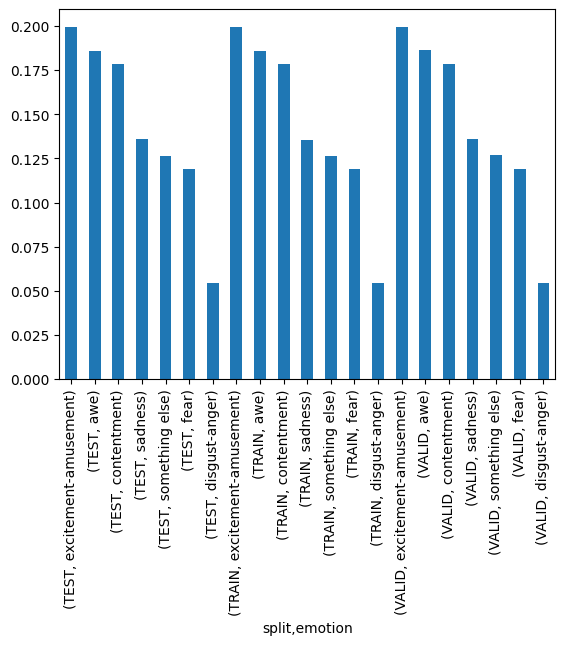

In [35]:
final_df.groupby(["split"])["emotion"].value_counts(normalize=True).plot(kind="bar")

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19000 entries, 3724 to 5021
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   19000 non-null  object 
 1   artist     19000 non-null  object 
 2   art_style  19000 non-null  object 
 3   year       11221 non-null  float64
 4   utterance  19000 non-null  object 
 5   emotion    19000 non-null  object 
 6   len        19000 non-null  int64  
 7   factor     19000 non-null  float64
 8   split      19000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [37]:
final_df.sample(10, random_state=SEED)

,painting,artist,art_style,year,utterance,emotion,len,factor,split
17238,pieter-bruegel-the-elder_james-the-late-empero...,pieter-bruegel-the-elder,Northern_Renaissance,1565.0,trying to explain my inability to turn my brai...,something else,13,1.0,TRAIN
4139,santiago-rusinol_figure-study,santiago-rusinol,Impressionism,NaN,i love the intimate feel of the scene and soft...,contentment,14,2.5,TRAIN
2707,giovanni-domenico-tiepolo_chinese-prince-in-fo...,giovanni-domenico-tiepolo,Rococo,1757.0,the woman on the left looks like she's up to n...,fear,27,1.0,TEST
4851,albert-marquet_nude-on-a-blue-background-1913,albert-marquet,Post_Impressionism,1913.0,the body is so beautifully drawn while allowin...,awe,32,1.0,TEST
5011,andy-warhol_maria-shriver-1986,andy-warhol,Pop_Art,1986.0,she looks fun and reminds me of glam rockers f...,excitement-amusement,13,1.0,TEST
3736,mikhail-vrubel_moses-1884,mikhail-vrubel,Art_Nouveau_Modern,1884.0,"the religious figure has a fixed, stern look t...",awe,18,1.0,TEST
1938,antoine-blanchard_les-grands-boulevards-sous-l...,antoine-blanchard,Impressionism,NaN,"those white horses get around, even on a snowy...",awe,38,1.0,TRAIN
2383,vasily-perov_lent-monday-1866,vasily-perov,Realism,1866.0,it looks like they are carrying beaver tails.,excitement-amusement,9,1.0,TEST
11648,pierre-bonnard_the-cock-and-the-hen,pierre-bonnard,Post_Impressionism,NaN,the simple drawing of the chicken reminds me o...,excitement-amusement,18,1.0,TRAIN
4640,lucian-freud_girl-sitting-in-the-attic-doorway,lucian-freud,Expressionism,NaN,i feel like she is a woman trapped into someth...,sadness,20,1.0,TEST


In [38]:
print(len(final_df[final_df["split"] == "TRAIN"]))
print(len(final_df[final_df["split"] == "VALID"]))
print(len(final_df[final_df["split"] == "TEST"]))

13300
1900
3800


In [39]:
final_df.sort_values(by="split", inplace=True, ignore_index=True)

In [40]:
# Save it
# final_df.to_csv("../data/final-splits.csv", index=False, header=True)